## Walmart : prédire les ventes hebdomadaires
### Description de l'entreprise 📇
Walmart Inc. est une société multinationale américaine de vente au détail qui exploite une chaîne d'hypermarchés, de grands magasins discount et d'épiceries des États-Unis, dont le siège est à Bentonville, Arkansas. L'entreprise a été fondée par Sam Walton en 1962.

### Projet 🚧
Le service marketing de Walmart nous a demandé de construire un modèle de machine learning capable d'estimer les ventes hebdomadaires dans leurs magasins, avec la meilleure précision possible sur les prédictions faites. Un tel modèle les aiderait à mieux comprendre comment les ventes sont influencées par les indicateurs économiques et pourrait être utilisé pour planifier de futures campagnes marketing.

### Objectifs 🎯
Le projet est divisé en trois étapes :

* Partie 1 : réalisation d'une EDA et tous les prétraitements nécessaires pour préparer les données pour le machine learning
* Partie 2 : entraînement d'un modèle de régression linéaire (baseline)
* Partie 3 : entraînement d'un modèle Random Forest Regressor
* Partie 4 : éviter le surajustement en entraînant un modèle de régression régularisé

### Portée de ce projet 🖼️
Pour ce projet, nous travaillons avec un ensemble de données *walmart_project_supervised_ifpass.csv* contenant des informations sur les ventes hebdomadaires réalisées par différents magasins Walmart, ainsi que d'autres variables telles que le taux de chômage ou le prix du carburant, qui pourraient être utiles pour prédire le montant des ventes.  

### Import des Bibliothèques nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio



### Chargement du jeu de données *walmart_project_supervised_ifpass.csv*

In [2]:
walmart_df = pd.read_csv('walmart_project_supervised_ifpass.csv')

### Partie 1 : EDA et prétraitement des données

In [4]:
# Basic stats
print("Number of rows and columns : {}".format(walmart_df.shape))
print()

print("Display of dataset: ")
display(walmart_df.head())
print()

print("Basics statistics: ")
data_desc = walmart_df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*walmart_df.isnull().sum()/walmart_df.shape[0])

Number of rows and columns : (6435, 9)

Display of dataset: 


,Unnamed: 0,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0,1,05-02-2010,1643690.90,0.0,42.31,2.572,211.096358,8.106
1,1,1,12-02-2010,1641957.44,1.0,38.51,2.548,211.242170,8.106
2,2,1,19-02-2010,1611968.17,0.0,39.93,2.514,211.289143,8.106
3,3,1,26-02-2010,1409727.59,0.0,46.63,2.561,211.319643,8.106
4,4,1,05-03-2010,1554806.68,0.0,46.50,2.625,211.350143,8.106



Basics statistics: 


,Unnamed: 0,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435,6.371000e+03,6371.000000,6371.000000,6371.000000,6435.000000,6371.000000
unique,NaN,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,3217.000000,23.000000,NaN,1.046394e+06,0.069377,60.663390,3.358832,171.578394,8.001736
std,1857.768823,12.988182,NaN,5.648095e+05,0.254114,18.460229,0.458920,39.356712,1.875847
min,0.000000,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,1608.500000,12.000000,NaN,5.526034e+05,0.000000,47.500000,2.933000,131.735000,6.895000
50%,3217.000000,23.000000,NaN,9.593395e+05,0.000000,62.680000,3.445000,182.616521,7.874000
75%,4825.500000,34.000000,NaN,1.419414e+06,0.000000,74.930000,3.735000,212.743293,8.622000



Percentage of missing values: 


Unnamed: 0      0.000000
Store           0.000000
Date            0.000000
Weekly_Sales    0.994561
Holiday_Flag    0.994561
Temperature     0.994561
Fuel_Price      0.994561
CPI             0.000000
Unemployment    0.994561
dtype: float64

In [3]:
#Suppression de la colonne Unnamed qui n'est pas utile
walmart_df = walmart_df.drop('Unnamed: 0', axis=1)
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0.0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1.0,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0.0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0.0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0.0,46.50,2.625,211.350143,8.106


In [4]:
#Suppression des lignes contenant des valeurs manquantes dans la variable cible
walmart_df.dropna(subset=['Weekly_Sales'], inplace=True)
walmart_df.shape

(6371, 8)

In [5]:
print("Percentage of missing values: ")
display(100*walmart_df.isnull().sum()/walmart_df.shape[0])

Percentage of missing values: 


Store           0.000000
Date            0.000000
Weekly_Sales    0.000000
Holiday_Flag    0.988856
Temperature     0.988856
Fuel_Price      1.004552
CPI             0.000000
Unemployment    1.004552
dtype: float64

#### Feature engineering

In [6]:
# Conversion la colonne 'Date' en type datetime en spécifiant le format
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'], format='%d-%m-%Y')

# Création de nouvelles colonnes pour l'année, le mois, le jour et le jour de la semaine
walmart_df['Year'] = walmart_df['Date'].dt.year
walmart_df['Month'] = walmart_df['Date'].dt.month
walmart_df['Day'] = walmart_df['Date'].dt.day
walmart_df['Day_of_Week'] = walmart_df['Date'].dt.dayofweek + 1  # Lundi = 1, Dimanche = 7

# Suppression de la colonne 'Date' pour éviter une colinéarité dans le modèle
walmart_df.drop('Date', axis=1, inplace=True)

walmart_df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_Week
0,1,1643690.90,0.0,42.31,2.572,211.096358,8.106,2010,2,5,5
1,1,1641957.44,1.0,38.51,2.548,211.242170,8.106,2010,2,12,5
2,1,1611968.17,0.0,39.93,2.514,211.289143,8.106,2010,2,19,5
3,1,1409727.59,0.0,46.63,2.561,211.319643,8.106,2010,2,26,5
4,1,1554806.68,0.0,46.50,2.625,211.350143,8.106,2010,3,5,5


In [8]:
# Calcul de la moyenne et l'écart type pour chaque colonne
mean_temp = walmart_df['Temperature'].mean()
std_temp = walmart_df['Temperature'].std()

mean_fuel = walmart_df['Fuel_Price'].mean()
std_fuel = walmart_df['Fuel_Price'].std()

mean_cpi = walmart_df['CPI'].mean()
std_cpi = walmart_df['CPI'].std()

mean_unemployment = walmart_df['Unemployment'].mean()
std_unemployment = walmart_df['Unemployment'].std()

# Définition des bornes inférieure et supérieure pour chaque colonne
lower_bound_temp = mean_temp - 3 * std_temp
upper_bound_temp = mean_temp + 3 * std_temp

lower_bound_fuel = mean_fuel - 3 * std_fuel
upper_bound_fuel = mean_fuel + 3 * std_fuel

lower_bound_cpi = mean_cpi - 3 * std_cpi
upper_bound_cpi = mean_cpi + 3 * std_cpi

lower_bound_unemployment = mean_unemployment - 3 * std_unemployment
upper_bound_unemployment = mean_unemployment + 3 * std_unemployment

# Filtre des lignes avec des valeurs aberrantes dans les colonnes spécifiées
walmart_df_df = walmart_df[
    (walmart_df['Temperature'] >= lower_bound_temp) & (walmart_df['Temperature'] <= upper_bound_temp) &
    (walmart_df['Fuel_Price'] >= lower_bound_fuel) & (walmart_df['Fuel_Price'] <= upper_bound_fuel) &
    (walmart_df['CPI'] >= lower_bound_cpi) & (walmart_df['CPI'] <= upper_bound_cpi) &
    (walmart_df['Unemployment'] >= lower_bound_unemployment) & (walmart_df['Unemployment'] <= upper_bound_unemployment)
]

In [9]:
print("Number of rows and columns : {}".format(walmart_df.shape))
print()

Number of rows and columns : (6371, 11)



#### Preprocessing 

In [10]:
# Séparation de la variable cible des variables explicatives
print("Separating labels from features...")
target_variable = "Weekly_Sales"

X = walmart_df.drop(target_variable, axis = 1)
Y = walmart_df.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

X :
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0      1           0.0        42.31       2.572  211.096358         8.106   
1      1           1.0        38.51       2.548  211.242170         8.106   
2      1           0.0        39.93       2.514  211.289143         8.106   
3      1           0.0        46.63       2.561  211.319643         8.106   
4      1           0.0        46.50       2.625  211.350143         8.106   

   Year  Month  Day  Day_of_Week  
0  2010      2    5            5  
1  2010      2   12            5  
2  2010      2   19            5  
3  2010      2   26            5  
4  2010      3    5            5  


In [11]:
# Division du dataset en Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [12]:
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Day_of_Week'] 
# Création d'un pipeline pour les fonctionnalités numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Les valeurs manquantes seront remplacées par la moyenne des colonnes
    ('scaler', StandardScaler())
])

In [15]:
categorical_features = ['Store','Holiday_Flag']

# Créer un pipeline pour les fonctionnalités categorielles
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # les valeurs manquantes seront remplacées par la valeur la plus fréquente
    ('float_to_int', FunctionTransformer(lambda x: x.astype(int), validate=False)), # Convertir un flottant en entier
    ('encoder', OneHotEncoder(drop='first'))
    ])

In [16]:
# Utilisation de ColumnTransformer pour créer un objet preprocessor qui décrit tous les traitements à effectuer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Temperature', 'Fuel_Price', 'CPI',
                                  'Unemployment', 'Year', 'Month', 'Day',
                                  'Day_of_Week']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('float_to_int',
                                                  FunctionTransformer(func=<function <lambda> at 0x000001BC646449D0>)),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Store', 'Holiday_Flag'])])

In [19]:
dim = X_train.shape
print("Nombre de lignes et colonnes dans l'ensemble de données :", dim)

Nombre de lignes et colonnes dans l'ensemble de données : (5096, 10)


In [20]:
# Preprocessings sur train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) 
print()

Performing preprocessings on train set...
      Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
4435     32           0.0        29.16       2.550  189.534100         9.014   
2613     19           0.0        41.78       3.049  132.924581         8.067   
539       4           0.0        59.81       3.707  130.826193         4.607   
4033     29           0.0        68.99       2.770  132.693226        10.409   
3753     27           0.0        57.78       2.903  136.627732         8.021   

      Year  Month  Day  Day_of_Week  
4435  2010      2   19            5  
2613  2010     11    5            5  
539   2012      3   16            5  
4033  2010      8   27            5  
3753  2010     10    8            5  
...Done.
  (0, 0)	-1.7239008935046147
  (0, 1)	-1.7826170524780098
  (0, 2)	0.45237105233232927
  (0, 3)	0.5339673443702948
  (0, 4)	-1.2168808426647133
  (0, 5)	-1.38284613574096
  (0, 6)	0.36915978823765305
  (0, 38)	1.0
  (1, 0)	-1.03632410951597

In [21]:
# Preprocessings sur test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) 
print('...Done.')
print(X_test[0:5,:]) 


Performing preprocessings on test set...
      Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
3808     27           0.0        51.81       3.757  140.444790         7.906   
3099     22           0.0        45.35       3.470  140.439786         7.706   
2600     19           0.0        74.20       2.942  132.614193         8.099   
825       6           0.0        62.80       3.734  222.818660         6.132   
1199      9           0.0        59.01       3.065  217.109568         6.416   

      Year  Month  Day  Day_of_Week  
3808  2011     10   28            5  
3099  2011     12    9            5  
2600  2010      8    6            5  
825   2012      3   16            5  
1199  2011      2   25            5  
...Done.
  (0, 0)	-0.48985856724925003
  (0, 1)	0.8711231536510793
  (0, 2)	-0.7953135030635339
  (0, 3)	-0.05989690497414262
  (0, 4)	0.041229275862301025
  (0, 5)	1.092276631168091
  (0, 6)	1.3984086956985478
  (0, 33)	1.0
  (1, 0)	-0.8418194249803

### Partie 2 : Modèle de base (régression linéaire)

In [22]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [23]:
# Print R^2 scores
print("R2 score on training set : ", regressor.score(X_train, Y_train))
print("R2 score on test set : ", regressor.score(X_test, Y_test))

R2 score on training set :  0.923224987807786
R2 score on test set :  0.9416074757775915


R² élevé celà signifie que le modèle de régression linéaire parvient à expliquer une part significative de la variance des données. Cependant, le jeu de données test présente un score encore plus élevé, cela indique un surajustement du modèle aux données d'entraînement.

In [26]:
# Predictions sur training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions sur test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[1143930.82942042 1559705.17906822 2057956.97823389 ... 1150877.35789219
 1427482.68984923 2228937.84947688]

Predictions on test set...
...Done.
[1828137.02975976 1137564.07870397 1448970.95270608 ... 1913855.85813929
 1850761.1599015   328365.50608757]



In [27]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.923224987807786
R2 score on test set :  0.9416074757775915


La forte relation linéaire entre les variables explicatives et la variable cible permet au modèle de réaliser des prédictions précises. Cependant, la présence d'un surajustement suggère que le modèle est trop adapté aux données d'entraînement, ce qui peut compromettre sa performance lorsqu'il est appliqué à de nouvelles données.

In [28]:
# Visualisation des predictions sur training set
fig = go.Figure()
fig.add_trace(go.Scatter(x=Y_train, y=Y_train_pred, mode='markers', name='Predictions'))
fig.add_trace(go.Scatter(x=Y_train, y=Y_train, mode='lines', name='Actual'))
fig.update_layout(title="Predictions on Training Set", xaxis_title="Actual Values", yaxis_title="Predicted Values")
fig.show()

# Visualize des predictions sur test set
fig = go.Figure()
fig.add_trace(go.Scatter(x=Y_test, y=Y_test_pred, mode='markers', name='Predictions'))
fig.add_trace(go.Scatter(x=Y_test, y=Y_test, mode='lines', name='Actual'))
fig.update_layout(title="Predictions on Test Set", xaxis_title="Actual Values", yaxis_title="Predicted Values")
fig.show()

In [29]:
#Extraction de mes variables explicatives
column_names = []

for name, pipeline, features_list in preprocessor.transformers_:
    if name == 'num':
        features = features_list
    else:
        features = pipeline.named_steps['encoder'].get_feature_names_out()
    column_names.extend(features)

print("Noms des colonnes correspondant à chaque coefficient : ", column_names)


Noms des colonnes correspondant à chaque coefficient :  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Day_of_Week', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x0_9', 'x0_10', 'x0_11', 'x0_12', 'x0_13', 'x0_14', 'x0_15', 'x0_16', 'x0_17', 'x0_18', 'x0_19', 'x0_20', 'x0_21', 'x0_22', 'x0_23', 'x0_24', 'x0_25', 'x0_26', 'x0_27', 'x0_28', 'x0_29', 'x0_30', 'x0_31', 'x0_32', 'x0_33', 'x0_34', 'x0_35', 'x0_36', 'x0_37', 'x0_38', 'x0_39', 'x0_40', 'x0_41', 'x0_42', 'x0_43', 'x0_44', 'x0_45', 'x1_1']


In [30]:
# Creation d'un DataFrame avec pandasexaminer les coefficients des variables
coefs = pd.DataFrame(index = column_names, data = regressor.coef_.transpose(), columns=["coefficients"])
coefs

,coefficients
Temperature,-3.703660e+04
Fuel_Price,7.740222e+03
CPI,3.405124e+05
Unemployment,-5.331430e+04
Year,-4.443151e+04
Month,4.177189e+04
Day,-9.809531e+03
Day_of_Week,0.000000e+00
x0_2,3.652213e+05
x0_3,-1.196843e+06


Nous Observons que certaines variables ont une influence positive sur les ventes hebdomadaires tandis que d'autres ont une influence négative.

In [31]:
# Extraction des coefficients en valeur absolue
coefficients = pd.Series(regressor.coef_, index=column_names)
coefs = pd.DataFrame({'Coefficients': coefficients.abs()})  # Création du DataFrame avec les coefficients absolus
coefs = coefs.sort_values(by='Coefficients', ascending=False)  # Tri des coefficients par valeur absolue
coefs



,Coefficients
x0_5,1.287755e+06
x0_4,1.226336e+06
x0_3,1.196843e+06
x0_36,1.165607e+06
x0_13,1.148745e+06
x0_30,1.120892e+06
x0_10,1.107615e+06
x0_9,1.095430e+06
x0_37,1.021987e+06
x0_16,9.308686e+05


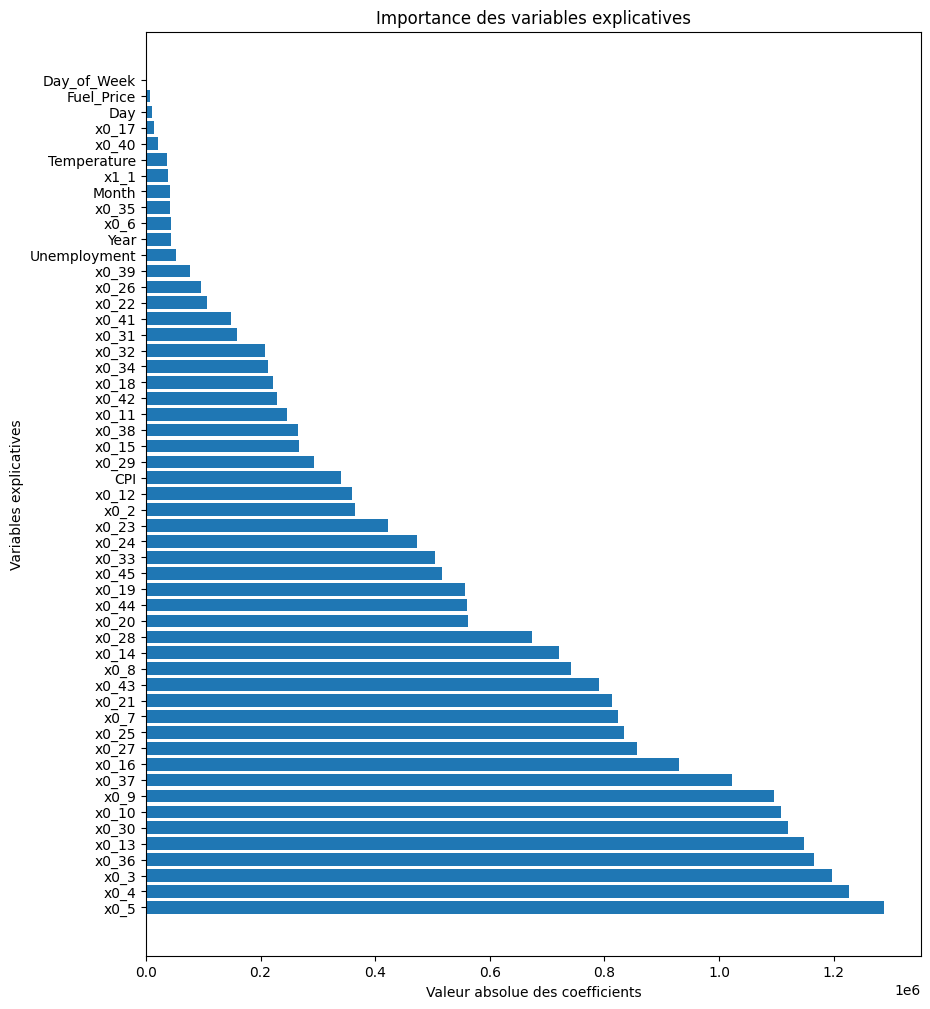

In [32]:
# Extraction des coefficients
coefficients = pd.Series(regressor.coef_, index=column_names)

# Création du DataFrame avec les coefficients absolus
coefs = pd.DataFrame({'Coefficients': coefficients.abs()})

# Tri des coefficients par valeur absolue
coefs = coefs.sort_values(by='Coefficients', ascending=False)

# Tracer la courbe
plt.figure(figsize=(10, 12))
plt.barh(coefs.index, coefs['Coefficients'])
plt.xlabel('Valeur absolue des coefficients')
plt.ylabel('Variables explicatives')
plt.title('Importance des variables explicatives')
plt.show()


### Modèle de regression linéaire régularisé

In [33]:
# Perform grid search
print("Grid search...")
regressor = Ridge()

# Grid of values to be tested
params = {
    'alpha': [0, 10, 20, 30],
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 5)
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0}
Best validation accuracy :  0.9214167370866833


Alpha avec une valeur de zéro se révèle être le meilleur choix en termes de performance du modèle. 

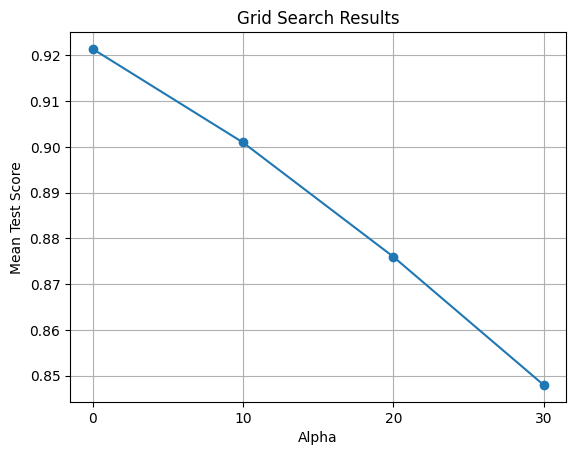

In [34]:
# Extraire les résultats de la recherche sur grille
results = gridsearch.cv_results_
alphas = params['alpha']

# Tracer la courbe
plt.plot(alphas, results['mean_test_score'], marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results')
plt.xticks(alphas)
plt.grid(True)
plt.show()


## Random Forest

In [35]:
# Perform grid search
print("Random Forest with default hyperparameters...")
regressor = RandomForestRegressor() # we must use a regressor here!
regressor.fit(X_train, Y_train)
print("...Done.")

Random Forest with default hyperparameters...
...Done.


In [37]:
# Print R^2 scores
print("R2 score on training set : ", regressor.score(X_train, Y_train))
print("R2 score on test set : ", regressor.score(X_test, Y_test))

R2 score on training set :  0.992198843455247
R2 score on test set :  0.9555086104827877


In [38]:
# Predictions sur training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions sur test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[1079174.4163 1464860.3336 2199903.0978 ... 1259627.9102 1379373.5526
 3186657.5024]

Predictions on test set...
...Done.
[1691852.0469 1168258.7562 1461186.1714 ... 2028727.7375 2008268.8044
  333983.1579]



In [39]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.992198843455247
R2 score on test set :  0.9555086104827877


Le modèle de Random Forest nous a fourni un score R² satisfaisant.

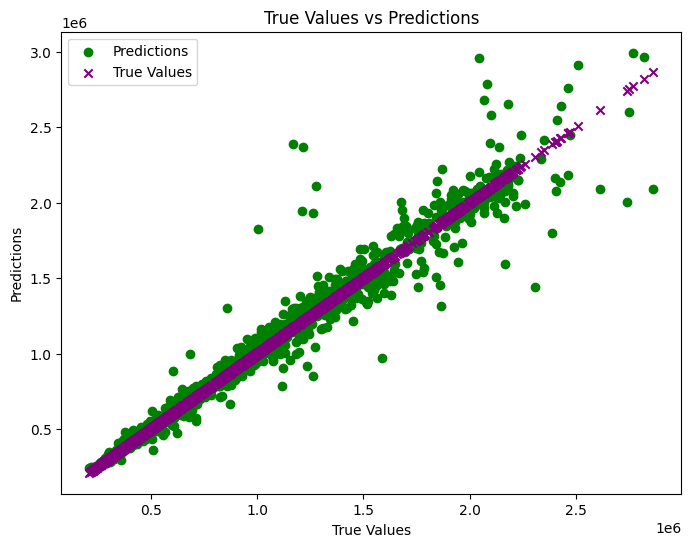

In [40]:
# Prédiction par rapport aux valeurs réelles
predictions = regressor.predict(X_test)

plt.figure(figsize=(8, 6))

# Tracer les valeurs réelles avec un marqueur 'o' (cercle) en vert
plt.scatter(Y_test, predictions, marker='o', color='green', label='Predictions')

# Tracer les prédictions avec un marqueur 'x' (croix) en violet
plt.scatter(Y_test, Y_test, marker='x', color='purple', label='True Values')

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.legend()  # Afficher la légende pour distinguer les ensembles de données
plt.show()

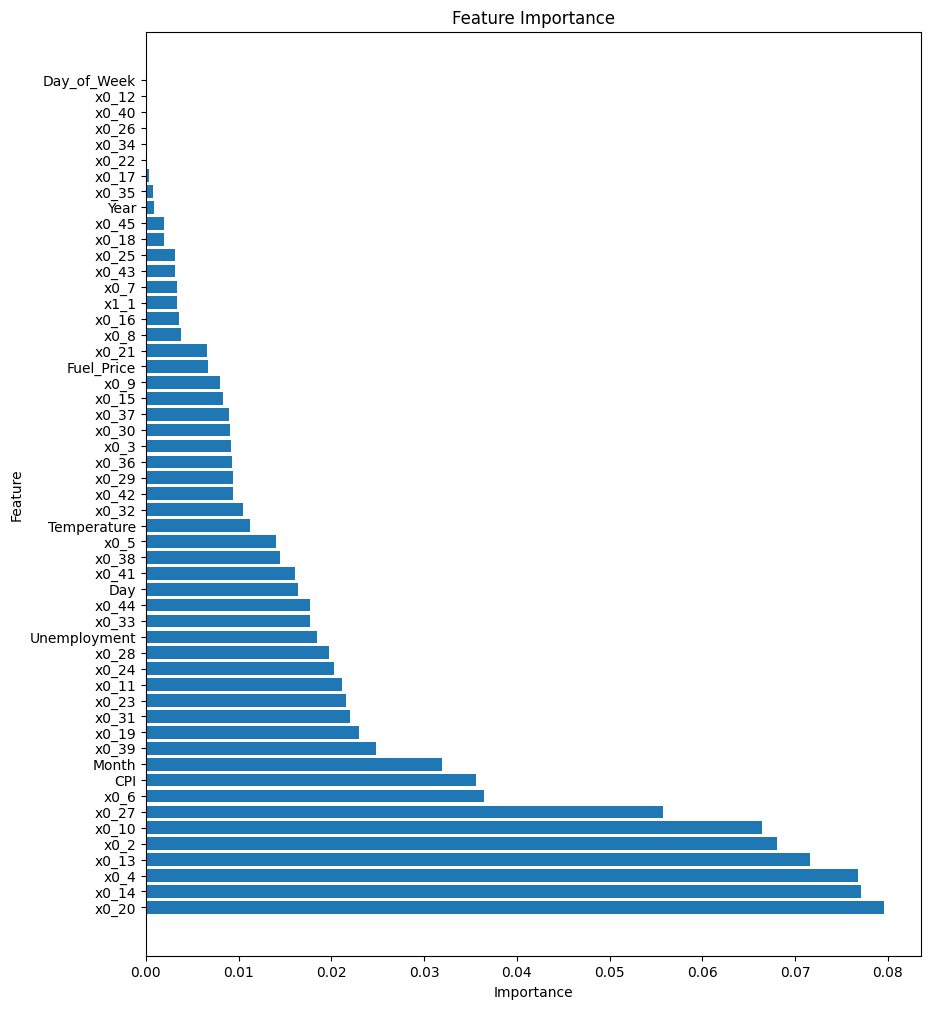

In [41]:
# Importance des caractéristiques
feature_importances = regressor.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': column_names, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Affichage de l'importance des caractéristiques
plt.figure(figsize=(10, 12))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [52]:
# Perform grid search
print("Grid search...")
regressor = RandomForestRegressor()

# Grille de valeurs à tester
params = {
    'max_depth': [10, 30, 50, 70],
    'min_samples_split': [2, 5, 8],
    'n_estimators': [50, 100, 150]
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3, verbose = 2)
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time=   2.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time=   2.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time=   2.5s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.8s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.7s
[CV] END .max_depth=10, min_samp

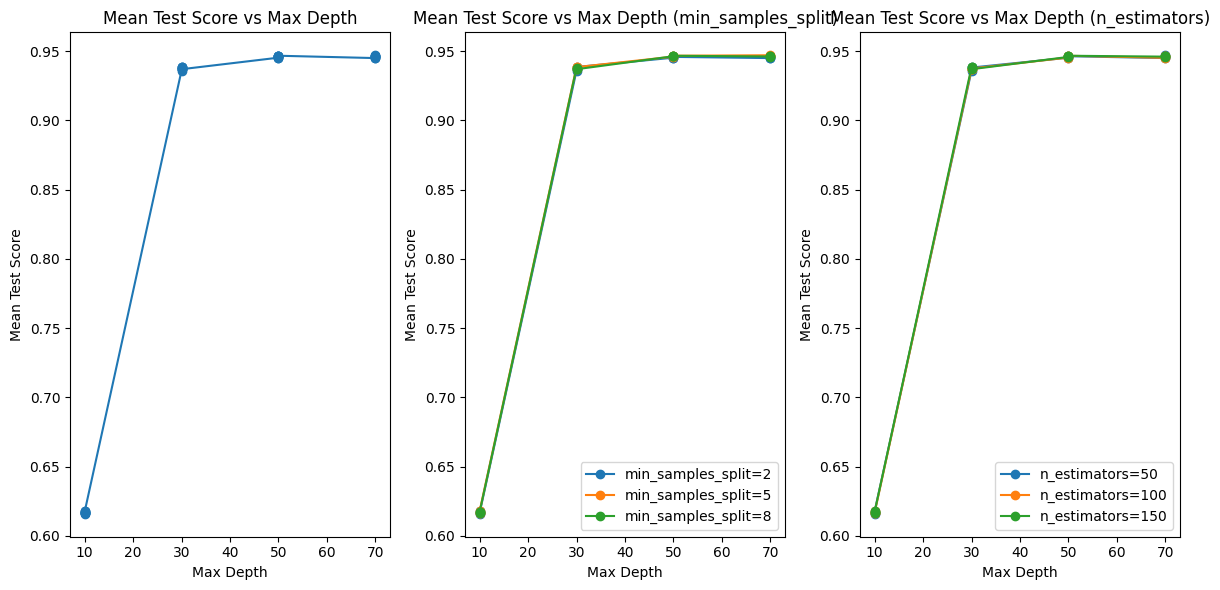

In [54]:
# Extract results
results = pd.DataFrame(gridsearch.cv_results_)

# Plot results
plt.figure(figsize=(12, 6))

# Plotting max_depth
plt.subplot(1, 3, 1)
plt.plot(results['param_max_depth'], results['mean_test_score'], marker='o')
plt.title('Mean Test Score vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')

# Plotting min_samples_split
plt.subplot(1, 3, 2)
for min_samples_split, group in results.groupby('param_min_samples_split'):
    plt.plot(group['param_max_depth'], group['mean_test_score'], marker='o', label=f'min_samples_split={min_samples_split}')
plt.title('Mean Test Score vs Max Depth (min_samples_split)')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.legend()

# Plotting n_estimators
plt.subplot(1, 3, 3)
for n_estimators, group in results.groupby('param_n_estimators'):
    plt.plot(group['param_max_depth'], group['mean_test_score'], marker='o', label=f'n_estimators={n_estimators}')
plt.title('Mean Test Score vs Max Depth (n_estimators)')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.legend()

plt.tight_layout()
plt.show()


In [55]:
# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch.score(X_test, Y_test))

# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# Print MAE
print("Mean Absolute Error on training set : ", mean_absolute_error(Y_train, Y_train_pred))
print("Mean Weekly_Sales on training set : ", Y_train.mean())
print()


R2 score on training set :  0.9857471021454021
R2 score on test set :  0.9563252074719064
Predictions on training set...
...Done.
[1076142.03263349 1490581.80342452 2182956.88194307 ... 1246388.20868857
 1377192.58215333 3093323.46905333]

Predictions on test set...
...Done.
[1721347.11393619 1166225.82355627 1478597.40341222 ... 2037739.07662126
 1995564.62251024  334411.74101746]

Mean Absolute Error on training set :  29698.648413324434
Mean Weekly_Sales on training set :  1045659.8833614601



In [ ]:
print("Mean Absolute Error on test set : ", mean_absolute_error(Y_test, Y_test_pred))
print("Mean Weekly_Sales on test set : ", Y_test.mean())
print("Standard-deviation on test set : ", Y_test.std())

Mean Absolute Error on test set :  57689.00468736742
Mean Weekly_Sales on test set :  1049327.5213176468
Standard-deviation on test set :  568582.2743709268


### Conclusion
À travers les modèles de Machine Learning supervisés, j'ai pu prédire les ventes hebdomadaires en fonction des variables explicatives. Le modèle de Random Forest s'est avéré plus performant que celui de la régression linéaire, qui présentait un cas d'overfitting. Ainsi, nous pouvons retenir que le type de magasin est le premier facteur influençant les ventes, suivi par le CPI, le mois, le jour, la température et le taux de chômage, ainsi que d'autres variables.
